# Hemoglobin Forecasting Notebook

This notebook demonstrates how to forecast hemoglobin (Hb) levels for Thalassemia patients and generate alerts when values fall below critical thresholds.

In [1]:

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta


In [2]:

# Step 2: Load the dataset
CSV_PATH = "sample_patients.csv"  # Make sure this file is uploaded to the notebook environment
df = pd.read_csv(CSV_PATH)
df.head()


,PatientID,Age,Gender,Weight,Height,BloodType,ThalassemiaType,LastTransfusionDate,HemoglobinLevel,AvgHemoglobinLast3,...,SleepQuality,HydrationLevel,PredictedHemoglobinNext,NextTransfusionDatePredicted,AIConfidence (%),RiskScore,HealthTipsGenerated,ActivityLevel,DigitalTwinID,Notes
0,P001,12,M,35,140,A+,Beta,2025-08-15,7.8,8.0,...,8,Medium,8.5,2025-09-05,88,15,Increase hydration; Maintain diet,Medium,P001,Regular chelation therapy
1,P002,8,F,25,120,B-,Beta,2025-08-12,6.9,7.2,...,6,Low,7.5,2025-09-01,82,20,Focus on sleep; Monitor fatigue,Low,P002,Occasional missed doses
2,P003,15,M,45,150,O+,Beta,2025-08-18,8.2,8.0,...,9,High,8.8,2025-09-12,90,10,Maintain activity; Continue therapy,High,P003,"Good adherence, active lifestyle"
3,P004,10,F,30,130,AB-,Beta,2025-08-10,7.0,7.1,...,7,Medium,7.6,2025-09-02,85,18,Improve diet; Hydration tips,Medium,P004,Needs follow-up on diet
4,P005,13,M,40,145,A-,Beta,2025-08-17,7.5,7.8,...,8,Medium,8.2,2025-09-07,87,14,Monitor activity; Continue medication,Medium,P005,"Stable, regular check-ups"


In [4]:
# Step 3: Forecast hemoglobin levels until next transfusion
# Assume transfusions occur every 30 days, and Hb drops gradually until then.

def forecast_hemoglobin(df, days=30):
    forecasts = []
    for i, row in df.iterrows():
        base_date = pd.to_datetime(row['LastTransfusionDate'])
        hb = row['HemoglobinLevel']
        for d in range(1, days+1):
            date = base_date + timedelta(days=d)
            # Linear decline assumption (can be replaced by ML model later)
            predicted_hb = max(5, hb - (0.1 * d))  
            forecasts.append({
                "PatientID": row['PatientID'],
                "Date": date,
                "Predicted_Hb": predicted_hb
            })
    return pd.DataFrame(forecasts)

forecast_df = forecast_hemoglobin(df)
forecast_df.head()


,PatientID,Date,Predicted_Hb
0,P001,2025-08-16,7.7
1,P001,2025-08-17,7.6
2,P001,2025-08-18,7.5
3,P001,2025-08-19,7.4
4,P001,2025-08-20,7.3


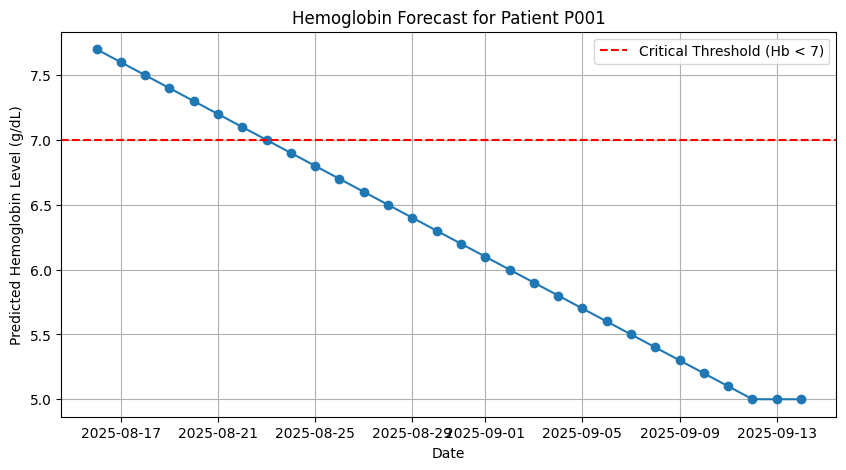

In [6]:
# Step 4: Visualize Hb forecasts for one sample patient
sample_patient_id = df.iloc[0]['PatientID']
sample_patient = forecast_df[forecast_df['PatientID'] == sample_patient_id]

plt.figure(figsize=(10,5))
plt.plot(sample_patient['Date'], sample_patient['Predicted_Hb'], marker='o')
plt.axhline(y=7, color='r', linestyle='--', label='Critical Threshold (Hb < 7)')
plt.title(f"Hemoglobin Forecast for Patient {sample_patient_id}")
plt.xlabel("Date")
plt.ylabel("Predicted Hemoglobin Level (g/dL)")
plt.legend()
plt.grid(True)
plt.show()


In [7]:

# Step 5: Generate alerts when Hb < 7
alerts = forecast_df[forecast_df['Predicted_Hb'] < 7]
alerts.head()


,PatientID,Date,Predicted_Hb
8,P001,2025-08-24,6.9
9,P001,2025-08-25,6.8
10,P001,2025-08-26,6.7
11,P001,2025-08-27,6.6
12,P001,2025-08-28,6.5


In [8]:

# Step 6: Save forecast results to CSV
OUTPUT_PATH = "Hemoglobin_Forecast.csv"
forecast_df.to_csv(OUTPUT_PATH, index=False)
print(f"Forecast saved to {OUTPUT_PATH}")


Forecast saved to Hemoglobin_Forecast.csv
